In [2]:
import matplotlib.pyplot as plt
import random

In [123]:
W = 30
h = [random.random() for i in range(W)]
hist_l = h[:W//2]
hist_r = h[W//2:]
len_r = len(hist_r)
len_l = len(hist_l)
assert(len_r + len_l == W)

In [124]:
dec_r = [hist_r[0]]
for i in range(1, len_r):
    dec_r.append(min(dec_r[-1], hist_r[i]))

In [125]:
dec_l = [hist_l[-1]]
for i in reversed(range(0, len_l-2)):
    dec_l.append(min(dec_l[-1], hist_l[i]))

In [126]:
import numpy as np
g = np.zeros((len_l, len_r))

In [127]:
for idx_l,val_l in enumerate(reversed(dec_l)):
    for idx_r, val_r in enumerate(reversed(dec_r)):
        g[idx_l][idx_r] = min(val_l, val_r) * (idx_r + idx_l)

In [128]:
g = np.log(1+g)

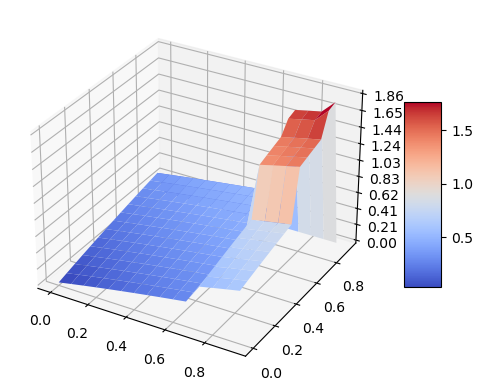

In [134]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make data.
X = np.arange(0, 1, 1/len_l)
Y = np.arange(0, 1, 1/len_r)
X, Y = np.meshgrid(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, g, cmap=cm.coolwarm,linewidth=0, antialiased=True)

# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')


# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [17]:
class Solution:
    def largestRectangleArea(self, heights):
        return self.fus(heights)

    def increment(self, t_r, up_lim, t_l, down_lim): # right, left
        if t_r < up_lim:
            print("foo")
            t_r += 1
            
        elif down_lim < t_l:
            print("bar")
            print("tl", t_l)
            t_l -= 1
            print("tl", t_l)
        return t_r,t_l
            
    
    def decrement(self, t_r, up_lim, t_l, down_lim):
        if down_lim < t_l:
            t_l -= 1
        elif t_r < up_lim:
            t_r += 1
        return t_r,t_l
        
    def fus(self, h):
        l = len(h)
        if l == 0:
            return 0

        if l == 1:
            return h[0]

        if l == 2:
            return 2*min(h[0],h[1])

        else: # len(h) >= 3
            i_d = l//2 + 1
            i_g = l//2
            h_g = h[i_g]
            h_d = h[i_d]
            min_common   = min(h_g, h_d)
            max_area_mid = 2 * min_common
            count = 0
            while(count < 100 and ((h_g > 0 and i_g > 0) or (h_d > 0 and i_d < l-1))):
                if  h_g == h_d:
                    print("cond1")
                    i_d,i_g = self.decrement(i_d, l-1, i_g, 0)
                    
                    i_d,i_g = self.increment(i_d, l-1, i_g, 0)
                    # le fait 2 fois, à régler
                    
                elif h_g < h_d:
                    print("cond2")
                    print(i_g)
                    self.increment(i_d, l-1, i_g, 0)
                    print(i_g)
                    
                elif h_g > h_d:
                    print("cond3")
                    self.decrement(i_d, l-1, i_g, 0)
                    
                h_g = min(h_g, h[i_g])
                h_d = min(h_d, h[i_d])
                min_common   = min(h_g, h_d)
                max_area_mid = (i_d - i_g + 1) * min_common
                print(i_g, i_d)
                count += 1
            return max(self.fus(h[:l//2+1]), self.fus(h[l//2+1:]), max_area_mid)

In [18]:
sol = Solution()

In [19]:
sol.fus([2,3,4])

cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 0
1
1 2
cond2
1
bar
tl 1
tl 

6